In [17]:
library(GLMsData)
library(statmod)
library(MASS)
library(splines)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(perm); perm$Day <- factor(perm$Day)

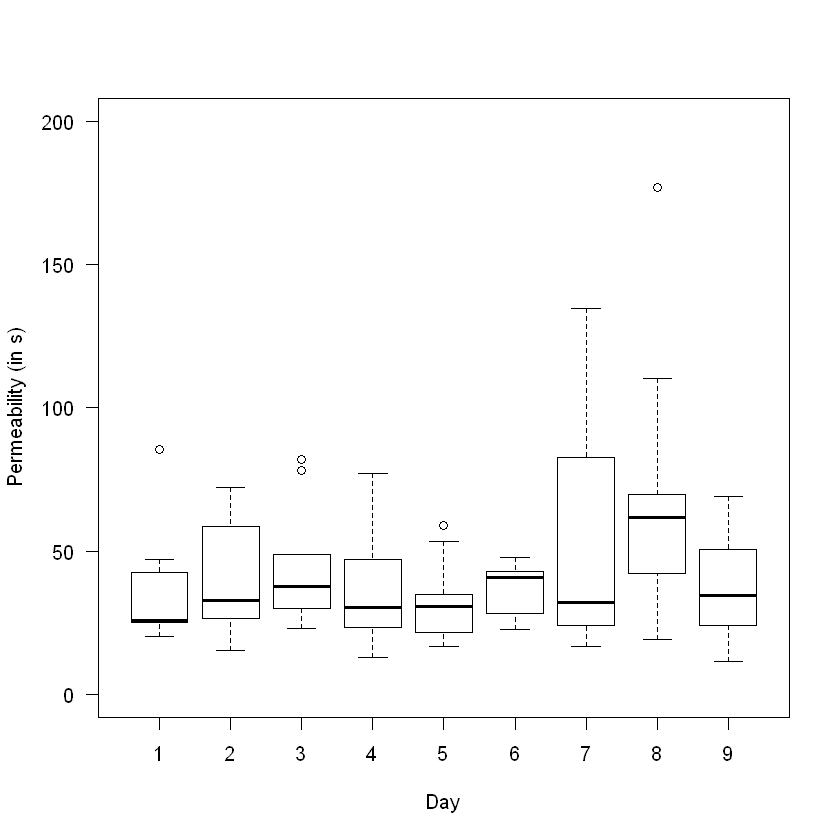

In [3]:
boxplot( Perm ~ Day, data=perm, las=1, ylim=c(0, 200),
xlab="Day", ylab="Permeability (in s)")

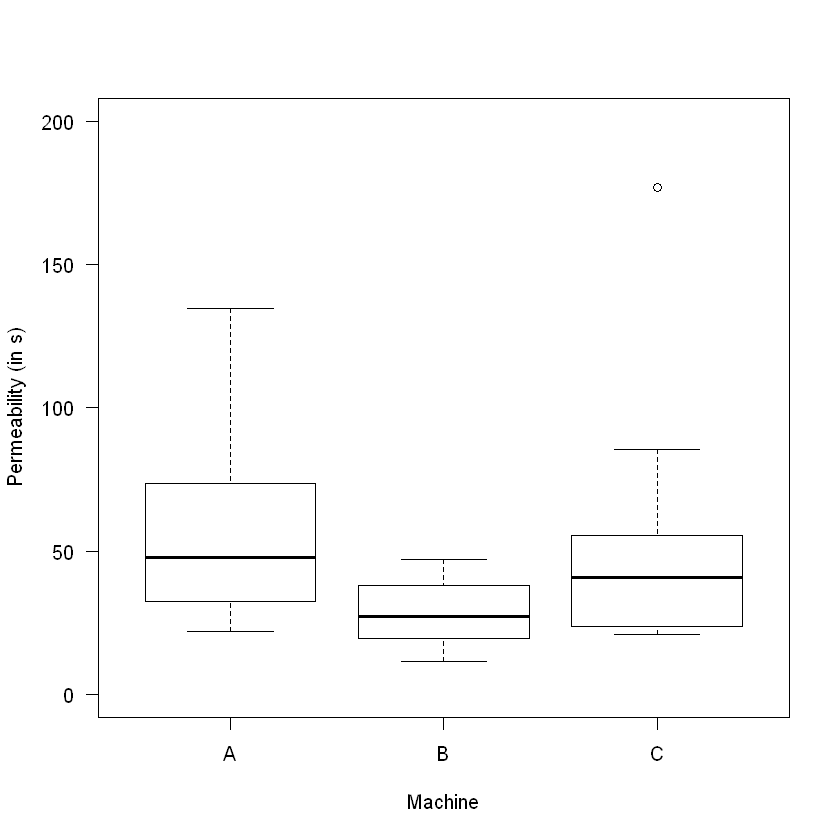

In [4]:
boxplot( Perm ~ Mach, data=perm, las=1, ylim=c(0, 200),
xlab="Machine", ylab="Permeability (in s)")

In [5]:
perm.log <- glm( Perm ~ Mach * Day, data=perm,family=inverse.gaussian(link="log") )

In [7]:
gof.dev <- deviance(perm.log)
gof.pearson <- sum(perm.log$weights * perm.log$residuals^2)

pchisq(gof.dev, df=df.residual(perm.log), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(perm.log), lower.tail = FALSE)

gof.dev
gof.pearson

[1] 1

[1] 1

[1] 0.2976509

[1] 0.2683183

In [8]:
coef(summary(perm.log))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),3.390361103,0.2217049,15.29222780,2.845284e-21
MachB,-0.007214551,0.3129740,-0.02305159,9.816941e-01
MachC,0.572228266,0.3691381,1.55017398,1.269412e-01
Day2,0.387215806,0.3486392,1.11064907,2.716405e-01
Day3,0.759996155,0.3927538,1.93504445,5.822958e-02
Day4,0.396098680,0.3495645,1.13312034,2.621697e-01
Day5,0.506209798,0.3615211,1.40022197,1.671665e-01
Day6,0.368433020,0.3467019,1.06267967,2.926566e-01
Day7,1.223735788,0.4650449,2.63143579,1.105973e-02
Day8,0.999096189,0.4273689,2.33778416,2.313380e-02


In [9]:
round( anova( perm.log, test="F"), 3)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,80,0.617,NA,NA
Mach,2,0.140,78,0.477,14.133,0.000
Day,8,0.069,70,0.408,1.747,0.108
Mach:Day,16,0.110,54,0.298,1.382,0.186


In [19]:
perm.log <- update( perm.log, Perm ~ Mach)

In [20]:
gof.dev <- deviance(perm.log)
gof.pearson <- sum(perm.log$weights * perm.log$residuals^2)

pchisq(gof.dev, df=df.residual(perm.log), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(perm.log), lower.tail = FALSE)

gof.dev
gof.pearson

[1] 1

[1] 1

[1] 0.4770103

[1] 0.5269463

In [21]:
coef(summary(perm.log))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),4.0010780,0.1169439,34.213662,9.992420e-49
MachB,-0.6389808,0.1445489,-4.420516,3.144156e-05
MachC,-0.1728634,0.1586845,-1.089353,2.793526e-01


In [22]:
round( anova( perm.log, test="F"), 3)

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,80,0.617,NA,NA
Mach,2,0.14,78,0.477,10.395,0


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 0.13501"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 0.012466"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 0.0015179"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 0.13501"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 0.012466"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 0.0015179"Warning message in simpl


	Shapiro-Wilk normality test

data:  qr1
W = 0.96986, p-value = 0.05299


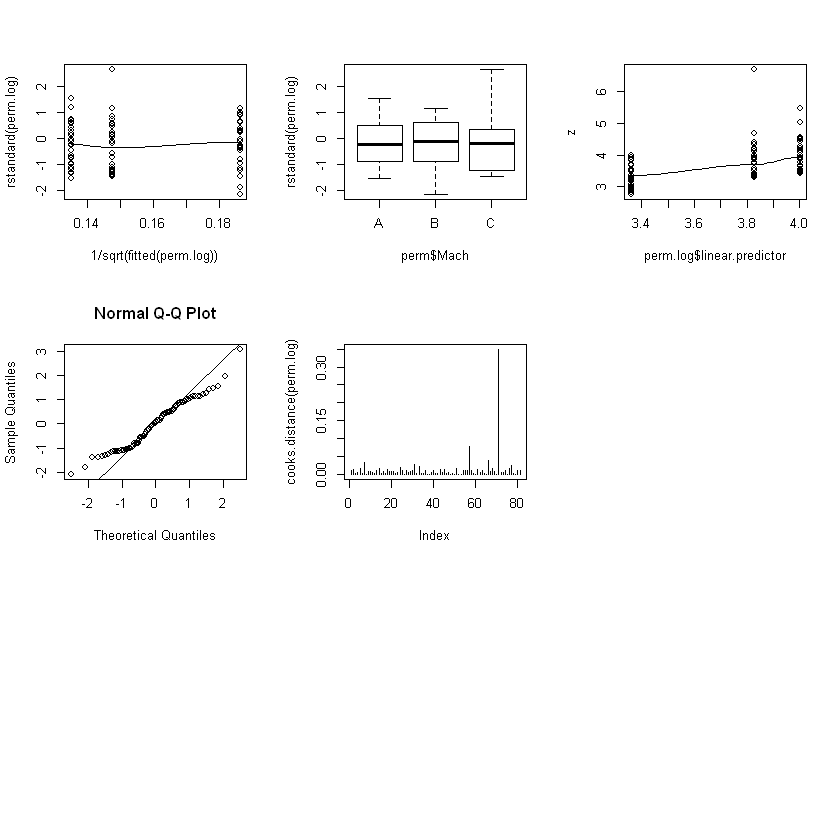

In [23]:
par(mfrow=c(3, 3))

scatter.smooth(rstandard(perm.log) ~ 1/sqrt(fitted(perm.log)))
#plot(rstandard(perm.log) ~ perm$Day)
plot(rstandard(perm.log) ~ perm$Mach)
z <- resid(perm.log, type="working") + perm.log$linear.predictor
scatter.smooth(z ~ perm.log$linear.predictor)
qqnorm(qr1 <- qresid(perm.log))
qqline(qr1)
plot(cooks.distance(perm.log), type="h")

In [24]:
colSums(influence.measures(perm.log)$is.inf)

dfb.1_ dfb.MchB dfb.MchC    dffit    cov.r   cook.d      hat 
       0        0        0        0        2        0        0